In [1]:
import sys

sys.path.append("../")
sys.path.append("../cascade")

print(sys.path)

from cascade.cascade_driver import CascadeDriver, CascadeEvent
from cascade.particle_event import CascadeParticle

particle = CascadeParticle(2212, 1e9, 0)
cas_event = CascadeEvent(emin_threshold = 1e3, particle = particle)


['/hetghome/antonpr/xmax_sigma/examples', '/hetghome/antonpr/.vscode-server/extensions/ms-toolsai.jupyter-2022.11.1003412109/pythonFiles', '/hetghome/antonpr/.vscode-server/extensions/ms-toolsai.jupyter-2022.11.1003412109/pythonFiles/lib/python', '/hetghome/antonpr/miniconda3/envs/env_impy/lib/python39.zip', '/hetghome/antonpr/miniconda3/envs/env_impy/lib/python3.9', '/hetghome/antonpr/miniconda3/envs/env_impy/lib/python3.9/lib-dynload', '', '/hetghome/antonpr/miniconda3/envs/env_impy/lib/python3.9/site-packages', '/hetghome/antonpr/impy/src', '../', '../cascade']
 |                                                  |
 |                 S I B Y L L  2.3d                |
 |                                                  |
 |         HADRONIC INTERACTION MONTE CARLO         |
 |                        BY                        |
 |            Eun-Joo AHN, Felix RIEHN              |
 |      R. ENGEL, A. FEDYNITCH, R.S. FLETCHER,      |
 |       T.K. GAISSER, P. LIPARI, T. STANEV        

In [3]:
shower = CascadeDriver(cas_event)
shower.run(particle)

In [4]:
final_prt = shower.get_particles()
print(f"Iterations = {shower.get_iterations()}, particles = {len(final_prt)}")

Iterations = 4523, particles = 93582


In [5]:
en_data = []

for i in range(len(final_prt)):
    en_data.append(final_prt[i].energy)
    
etot = 0
for ee in en_data:
    etot += ee
    
print(f"Energy conservation = {abs(etot - 1e9)/1e9}")

Energy conservation = 3.0872657430171965e-06


Min = 1.07e+07 eV, Max = 8.57e+16 eV


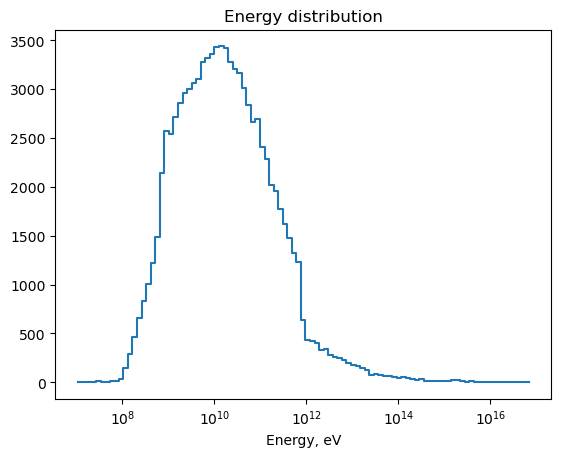

In [6]:
import matplotlib.pyplot as plt
import numpy as np


gr, cnt = np.histogram(np.log10(en_data), 100)
plt.semilogx()
plt.step(10**cnt[:-1]*1e9, gr)
plt.title("Energy distribution")
plt.xlabel("Energy, eV")
# plt.loglog(basex = 10)
# plt.stairs(gr,cnt)
# print(10**cnt)
np.min(en_data)*1e9/1e6
print(f"Min = {np.min(en_data)*1e9:0.2e} eV, Max = {np.max(en_data)*1e9:0.2e} eV")  

{111: 25081, 211: 19711, -211: 19347, 22: 5887, 2212: 2961, 2112: 2516, 310: 1904, 130: 1863, 321: 1857, -321: 1716, -14: 1603, 14: 1602, 11: 1111, -12: 1071, -11: 1002, -2112: 963, 12: 962, -2212: 941, 3122: 348, 3222: 198, 3212: 189, -3122: 180, 3112: 145, -3112: 122, -3212: 109, -3222: 102, -3322: 30, 3312: 19, 3322: 18, -3312: 17, 13: 4, -13: 3}


Text(0.5, 1.0, 'Particle type distribution')

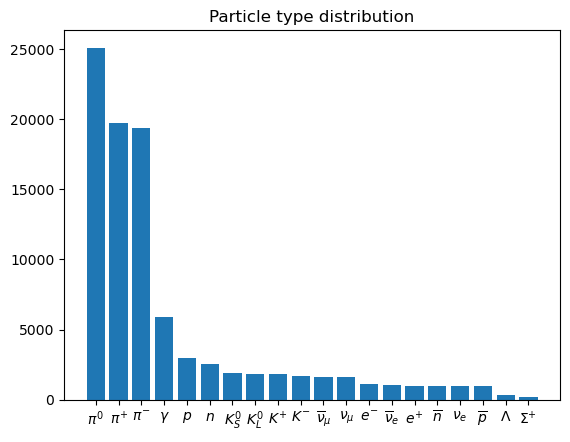

In [7]:
import particle
pid_dist = dict()

for prt in final_prt:
    pid_dist[prt.pid] = pid_dist.get(prt.pid, 0) + 1
    
pid_dist = dict(sorted(pid_dist.items(), key=lambda item: item[1], reverse=True))    
print(pid_dist)  

all_pdgs = {int(p.pdgid) : f"${p.latex_name}$" for p in particle.Particle.findall()}

ptypes = [all_pdgs[i] for i in pid_dist.keys()]
pnum = list(pid_dist.values())
plt.bar(ptypes[:20], pnum[:20])
plt.title("Particle type distribution")